In [5]:
import numpy as np
import matplotlib.pyplot as plt
import Adaptive_Two_Mode_Optimizer

In [28]:
def Print_List_Of_Functions():
    print("The functions in this library are:")
    print("------------------------------------")
    print("")
    print("BeLU(x)")
    print("Tanh(x)")
    print("Sigmoid(x)")
    print("RelU(x)")
    print("Leaky_Relu(x,alpha)")  
    print("Complex_BeLU(x)")
    print("Complex_Tanh(x)")
    print("Complex_Sigmoid(x)")
    print("Complex_RelU(x)")
    print("Complex_Leaky_Relu(x,alpha)") 
    print("Reshape_into_5_layer_net(Parameter_Vector,Number_Of_Nurons_in_5_layer_net)") ## This should be a generice function
    print("Run_Through_5_layer_Net(Net,X)")
    print("Count_Total_Parameters_In_Net(Number_Of_Nurons_in_5_layer_net )")
    print("Count_Total_Parameters_In_Complex_Net(Number_Of_Nurons_in_5_layer_net )")
    print("Best_Parameters_After_Optimization = Adaptive_Two_Mode_Optimizer.optimize(Cost_Function, Parameter_Vector, remaining_evals )")
    print("")
    print("------------------------------------")
    print("And that's about it")
    print("")
Print_List_Of_Functions()




def BeLU(x): ## "BeLU" = Bent Linear Unit, 
    return x - np.exp(-x**2)*np.sin(x)

def Complex_BeLU(x):
    return x.real - np.exp(-x.real**2)*np.sin(x.real) + 1j*(x.imag - np.exp(-x.imag**2)*np.sin(x.imag))



def Tanh(x):
    return np.tanh(x)

def Sigmoid(x):
    return 1/(1 + np.exp(-x))

def RelU(x):
    return np.maximum(x,0)

def Leaky_Relu(x,alpha):
    return np.maximum(x,0) + alpha*np.minimum(x,0)


def Complex_Tanh(x):
    return np.tanh(x.real) + 1j*np.tanh(x.imag)

def Complex_Sigmoid(x):
    return 1/(1 + np.exp(-x.real)) + 1j/(1 + np.exp(-x.imag))

def Complex_RelU(x):
    return np.maximum(x.real,0) + 1j*np.maximum(x.imag,0)

def Complex_Leaky_Relu(x,alpha):
    return np.maximum(x.real,0) + 0.1*np.minimum(x.real,0) + 1j*(np.maximum(x.imag,0) + 0.1*np.minimum(x.imag,0))

    
x = 0.5
print(BeLU(x))

The functions in this library are:
------------------------------------

BeLU(x)
Tanh(x)
Sigmoid(x)
RelU(x)
Leaky_Relu(x,alpha)
Complex_BeLU(x)
Complex_Tanh(x)
Complex_Sigmoid(x)
Complex_RelU(x)
Complex_Leaky_Relu(x,alpha)
Reshape_into_5_layer_net(Parameter_Vector,Number_Of_Nurons_in_5_layer_net)
Run_Through_5_layer_Net(Net,X)
Count_Total_Parameters_In_Net(Number_Of_Nurons_in_5_layer_net )
Count_Total_Parameters_In_Complex_Net(Number_Of_Nurons_in_5_layer_net )
Best_Parameters_After_Optimization = Adaptive_Two_Mode_Optimizer.optimize(Cost_Function, Parameter_Vector, remaining_evals )

------------------------------------
And that's about it

0.12662301511061663


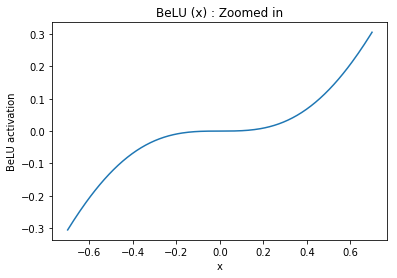

In [7]:
x = np.linspace(-0.7,0.7,200)
y = BeLU(x)
plt.plot(x,y)
plt.ylabel("BeLU activation")
plt.xlabel("x")
plt.title("BeLU (x) : Zoomed in")

In [8]:
## Make this into a function called - "Design Complex Feed Forward Net"
# Ma another called - "Design Feed Forward Net"

Number_Of_Nurons_in_5_layer_net = np.array([5,3,3,3,1]) ## The first and last indexes represent the inputs and ouptputs respectively

def Count_Total_Parameters_In_Net(Number_Of_Nurons_in_5_layer_net ):
    TotalParameters_in_5_layer_net = (Number_Of_Nurons_in_5_layer_net[0]*Number_Of_Nurons_in_5_layer_net[1] + \
    Number_Of_Nurons_in_5_layer_net[1]*Number_Of_Nurons_in_5_layer_net[2] + \
    Number_Of_Nurons_in_5_layer_net[2]*Number_Of_Nurons_in_5_layer_net[3] +\
    Number_Of_Nurons_in_5_layer_net[3]*Number_Of_Nurons_in_5_layer_net[4] + np.sum(Number_Of_Nurons_in_5_layer_net))
    return TotalParameters_in_5_layer_net

def Count_Total_Parameters_In_Complex_Net(Number_Of_Nurons_in_5_layer_net ):
    return 2*Count_Total_Parameters_In_Net(Number_Of_Nurons_in_5_layer_net )



TotalParameters_in_5_layer_net = Count_Total_Parameters_In_Complex_Net(Number_Of_Nurons_in_5_layer_net )
print("TotalParameters_in_5_layer_net",Count_Total_Parameters_In_Complex_Net(Number_Of_Nurons_in_5_layer_net ))

TotalParameters_in_5_layer_net 134


In [9]:
## Defining the 5 layer complex network


class Net5_(object):
    
    def __init__(self, Parameter_Vector, Number_Of_Nurons_in_5_layer_net):
        
        N_0 = 0
        N1 = Number_Of_Nurons_in_5_layer_net[0]
        N2 = Number_Of_Nurons_in_5_layer_net[1]
        N3 = Number_Of_Nurons_in_5_layer_net[2]
        N4 = Number_Of_Nurons_in_5_layer_net[3]
        N5 = Number_Of_Nurons_in_5_layer_net[4]
        
        ## Reshaping into Weights
        self.W1 = Parameter_Vector[N_0 :N_0 + N1*N2].reshape(N1,N2) + \
                    1j*Parameter_Vector[N_0 + N1*N2:N_0 + 2*N1*N2].reshape(N1,N2)
        N_0 += 2*N1*N2     
        
        self.W2 =Parameter_Vector[N_0:N_0 + N2*N3].reshape(N2,N3) + \
                    1j*Parameter_Vector[N_0+ N2*N3:N_0 + 2*N2*N3].reshape(N2,N3)
        N_0 += 2*N2*N3      
        
        self.W3 =Parameter_Vector[N_0:N_0 + N3*N4].reshape(N3,N4) + \
                    1j*Parameter_Vector[N_0+ N3*N4:N_0 + 2*N3*N4].reshape(N3,N4)
        N_0 += 2*N3*N4      

        self.W4 =Parameter_Vector[N_0:N_0 + N4*N5].reshape(N4,N5) + \
                    1j*Parameter_Vector[N_0+ N4*N5:N_0 + 2*N4*N5].reshape(N4,N5)
        N_0 += 2*N4*N5     
        
#         self.W5 =Parameter_Vector[N_0:N_0 + N5*1].reshape(N5,1) + \
#                     1j*Parameter_Vector[N_0+ N5*1:N_0 + 2*N5*1].reshape(N5,1)
#         N_0 += 2*N5*1          
        
        
        ## Reshaping into biases
        self.b1 = Parameter_Vector[N_0 :N_0 + N2].reshape(N2,1) + 1j*Parameter_Vector[N_0 + N2:N_0 + 2*N2].reshape(N2,1)
        N_0 += 2*N2        
        
        self.b2 =  Parameter_Vector[N_0:N_0 + N3].reshape(N3,1) + 1j* Parameter_Vector[N_0 + N3:N_0 + 2*N3].reshape(N3,1)
        N_0 += 2*N3      
        
        self.b3 =  Parameter_Vector[N_0:N_0 + N4].reshape(N4,1) + 1j* Parameter_Vector[N_0 + N4:N_0 + 2*N4].reshape(N4,1)
        N_0 += 2*N4      
        
        self.b4 =  Parameter_Vector[N_0:N_0 + N5].reshape(N5,1) + 1j* Parameter_Vector[N_0 + N5:N_0 + 2*N5].reshape(N5,1)
        N_0 += 2*N5        
        
#         print(N_0)
#         self.b5 = Parameter_Vector[N_0:N_0 + 1].reshape(1,1) + 1j*Parameter_Vector[N_0 + 1:N_0 + 2*1].reshape(1,1)
#         N_0 += 2*1    
        
def Reshape_into_5_layer_net(Parameter_Vector,Number_Of_Nurons_in_5_layer_net):
    Net_ = Net5_(Parameter_Vector,Number_Of_Nurons_in_5_layer_net)
    return Net_





Parameter_Vector = np.random.rand(TotalParameters_in_5_layer_net)
Net5 = Reshape_into_5_layer_net(Parameter_Vector,Number_Of_Nurons_in_5_layer_net)

print(Net5.W4.shape)

(3, 5)


In [10]:
def Run_Through_5_layer_Net(Net,X):

    
    
    
        Z1 = np.dot(Net.W1.T,X) + Net.b1
        A1 = np.maximum(Z1.real,0) - 0.1*np.minimum(Z1.real,0) 


        Z2 = np.dot(Net.W2.T,A1) + Net.b2
        A2 = np.maximum(Z2.real,0) + 0.1*np.minimum(Z2.real,0) + 1j*(np.maximum(Z2.imag,0) + 0.1*np.minimum(Z2.imag,0))
    
        Z3 = np.dot(Net.W3.T,A2) + Net.b3
        A3 = np.maximum(Z3.real,0) + 0.1*np.minimum(Z3.real,0) + 1j*(np.maximum(Z3.imag,0) + 0.1*np.minimum(Z3.imag,0))        
        
        Z4 = np.dot(Net.W4.T,A3) + Net.b4
#         A4 = np.maximum(Z4.real,0) + 0.1*np.minimum(Z4.real,0) + 1j*(np.maximum(Z4.imag,0) + 0.1*np.minimum(Z4.imag,0))
        A4 = BeLU(Z4.real)
        

        return A4

X = np.random.rand(5,10) + 1j*(np.random.rand(5,10)-0.5)   
print(Run_Through_5_layer_Net(Net5,X)[1,:])

[-19.48594773 -19.75213842 -23.51504035 -26.4720929  -17.01640918
 -24.78247272 -26.22956125 -16.84404108 -21.02331881 -25.80880519]


In [31]:
## In this example the goal will to try to mimic an ill-conditioned N-D parabula
## this inputs will be the position in N-D, and the output will be the value of the parabula,

def function_To_Mimic(x): 
    return np.sum((100**(np.arange(D)/D))*((x-X_Optimal)**2) )



D = 5
X_Optimal = 10*(np.random.rand(D)-0.5)

Number_Of_Samples = 1000
X = 10*(np.random.rand(D,Number_Of_Samples)-0.5)
Y = np.zeros(Number_Of_Samples)

for i in range(Number_Of_Samples):
    Y[i] = function_To_Mimic(X[:,i])



In [32]:

def Cost_Function(Individuals_Parameter_Vector):
    Net5 = Reshape_into_5_layer_net(Individuals_Parameter_Vector,Number_Of_Nurons_in_5_layer_net)
    Predictions = Run_Through_5_layer_Net(Net5,X)[0,:]
    
    Cost = (1/Number_Of_Samples)*np.sum((Y-Predictions)**2)
    return Cost
    
    
    
### This is where you decide on the 5 layer architecture
Number_Of_Nurons_in_5_layer_net = np.array([D,3,3,3,1]) 
### This is where you decide on the 5 layer architecture
TotalParameters_in_5_layer_net = Count_Total_Parameters_In_Complex_Net(Number_Of_Nurons_in_5_layer_net )

### Check what is the initial Cost Function
Parameter_Vector = np.random.rand(TotalParameters_in_5_layer_net)
print("Cost Function Before Optimization",Cost_Function(Parameter_Vector))



### Decide how many function evaluations/samples you want to try for the optimization (like iterations for SGD)
remaining_evals = 5000

### This is the Optimization algorithm
Best_Parameters_After_Optimization = Adaptive_Two_Mode_Optimizer.optimize(Cost_Function, Parameter_Vector, remaining_evals )
print("Cost Function After Optimization",Cost_Function(Best_Parameters_After_Optimization ))

Cost Function Before Optimization 3687173.6977756512
Cost Function After Optimization 34697.876296522416
